# Group 40 Project Proposal

***
Oliver and Kristen's section
***

## Introduction

Begin by providing some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.

Clearly state the question you will try to answer with your project. Your question should involve one or more random variables of interest, spread across two or more categories that are interesting to compare. For example, you could consider the annual maxima river flow at two different locations along a river, or perhaps gender diversity at different universities. Of the response variable, identify one location parameter (mean, median, quantile, etc.) and one scale parameter (standard deviation, inter-quartile range, etc.) that would be useful in answering your question. Justify your choices.

UPDATE (Mar 1, 2022): If it doesn’t make sense to infer a scale parameter, you can choose another parameter, or choose a second variable altogether. Ultimately, we’re looking for a comprehensive inference analysis on one parameter spread across 2+ groups (with at least one hypothesis test), plus a bit more (such as an investigation on the variance, a quantile, or a different variable). In total, you should use both bootstrapping and asymptotics somewhere in your report at least once each. Also, your hypothesis test(s) need not be significant: it is perfectly fine to write a report claiming no significant findings (i.e. your p-value is large).

Identify and describe the dataset that will be used to answer the question. Remember, this dataset is allowed to contain more variables than you need – feel free to drop them!

Also, be sure to frame your question/objectives in terms of what is already known in the literature. Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section). We have no specific citation style requirements, but be consistent.


**Our Topic:**
The gender pay gap is the difference between wages earned by men and women. The disparity has long been reported (Maloney 2016)(Bishu & Alkadry, 2016), and many possible reasons have been cited, including the glass ceiling (lack of upward mobility for women within an organizaiton), position and agency segregation (a tendency to work in particular roles and fields), and human capital (Alkadry & Tower, 2006). The Equal Pay Act was signed by President John F.Kennedy in 1963 (Equal Pay Act of 1963) and it mandates that women should receive equal pay for doing "substantially equal" work. Over the last 50 years, numerous laws and legislation have been passed in hope to deminish the disparity. However, Statistic Canada reported that female employees in Ontario earned $0.75 for every dollars earned by men in 2020 (Statistics Canada 2022). 

In this report, we would confirm whether women are earning less than men. Our population of interest is females and males working in North America. Null hypothesis is that men and women earn the same income. We will compare the mean difference of income and standard deviation between men and women. We use the mean because we want to base the discrepancy off the average values between men and women so that we can determine trends applicable to the typical person. The standard deviation represents the variability in a gender's wages, which can help explain causes of wage disparity or highlight if disparity exists in the variability of wages or simply as an offset of the distributions. To achieve this, we used a dataset genereated by scraping of Glassdoor. It contains income for various job titles based on gender. 



**need to add hypothesis to the intro**

**Dataset**:
* Found using <a href="https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap" target="_blank">this link</a> 

* Dataset is scraped from <a href="https://www.glassdoor.com/" target="_blank">Glassdoor website</a> 



## Preliminary Results
Demonstrate that the dataset can be read from the web into R.

Clean and wrangle your data into a tidy format.

Plot the relevant raw data, tailoring your plot in a way that addresses your question.

Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.

In [1]:
#library needed for this project
library(tidyverse)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(tidymodels)
library(repr)
library(cowplot)
library(broom)
library(digest)
library(infer)
library(gridExtra)
install.packages("lattice")
library(lattice)
install.packages("reshape2")
library(reshape2)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

### Load data into Jupyter notebook

In [2]:
df <- read_csv("https://raw.githubusercontent.com/kristennli/stat201/main/glassdoor.csv")

Rows: 1000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): JobTitle, Gender, Education, Dept
dbl (5): Age, PerfEval, Seniority, BasePay, Bonus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The features of the data set are:
* Job Title
* Gender
* Age: age in years
* PerfEval: performance evaluation score
* Education: level of education
* Dept: department
* Seniority: Seniority (No of years worked)
* Base Pay: Annual Basic Pay in USD
* Bonus: Annual Bonus Pay in USD

In [3]:
summary(df %>% select(BasePay,Bonus))

    BasePay           Bonus      
 Min.   : 34208   Min.   : 1703  
 1st Qu.: 76850   1st Qu.: 4850  
 Median : 93328   Median : 6507  
 Mean   : 94473   Mean   : 6467  
 3rd Qu.:111558   3rd Qu.: 8026  
 Max.   :179726   Max.   :11293  

In [4]:
# check for missing values
sum(is.na(df))

[1] 0

No missing values in dataset.

### EDA

We first investigate the distribution of different features between men and women to verify if the population is a normal distribution.

In [5]:
# display the first 6 rows of the dataset features
head(df)

JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


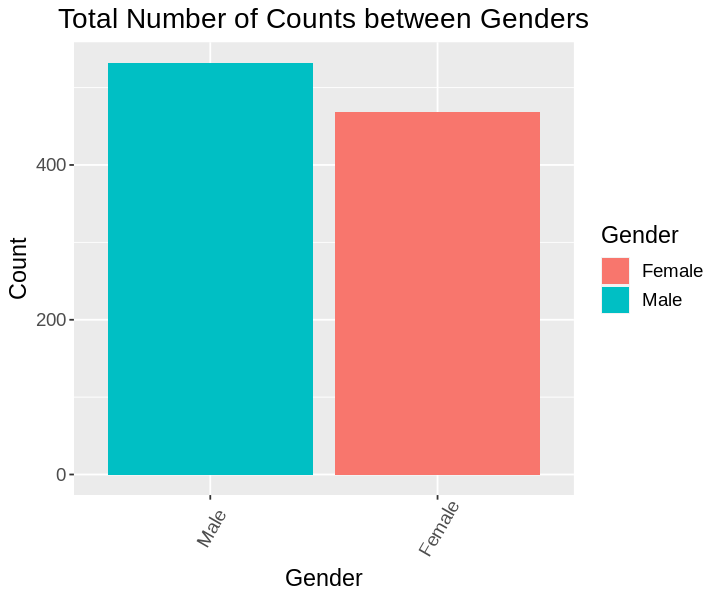

In [6]:
options(repr.plot.width = 6, repr.plot.height = 5)

# check class imbalance
gender_pop <- df %>%
    group_by(Gender) %>%
    summarise(n=n())%>%
    arrange(desc(n))

# plot the total counts of samples for the 2 genders
gender_pop <- gender_pop%>%
  ggplot(aes(x = reorder(Gender, -n), y = n, fill = Gender))+
  geom_bar(stat = 'identity')+
  labs(x = "Gender",
       y = "Count", 
       fill = "Gender",
       title = "Total Number of Counts between Genders")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 14))+
  theme(plot.title = element_text(hjust = 0.5))


gender_pop

The dataset contains balanced gender classes.

`summarise()` has grouped output by 'Gender'. You can override using the
`.groups` argument.


Gender,JobTitle,n
<chr>,<chr>,<int>
Female,Data Scientist,53
Female,Driver,46
Female,Financial Analyst,49
⋮,⋮,⋮
Male,Sales Associate,51
Male,Software Engineer,101
Male,Warehouse Associate,44


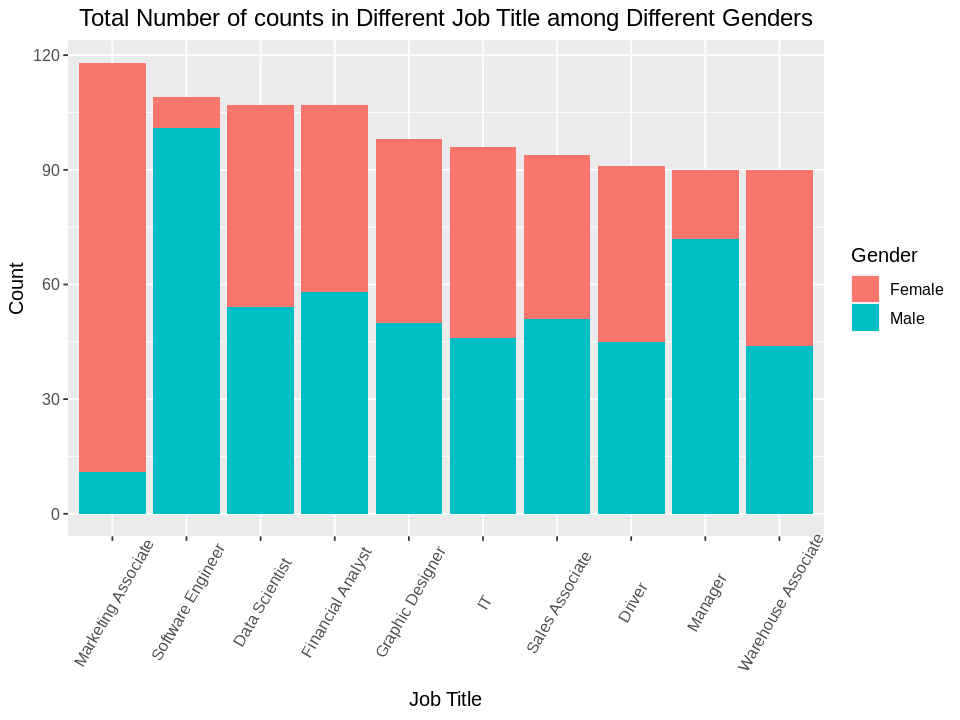

In [7]:
# Job title distribution
title <- df %>%
    group_by(Gender,JobTitle) %>%
    summarise(n=n())
title

options(repr.plot.width = 8, repr.plot.height = 6)

# plot thee different job titles for the 2 different genders
title_dist <- title %>%
    ggplot(aes(x = reorder(JobTitle, -n), y = n, fill = Gender))+
  geom_bar(stat = 'identity')+
  labs(x = "Job Title",
       y = "Count", 
       fill = "Gender",
       title = "Total Number of counts in Different Job Title among Different Genders")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 12))+
  theme(plot.title = element_text(hjust = 0.5))

title_dist

The job title distribution of male and female shows that there is imbalance in certain fields, namely Software Markerting Associate, Enginneer and Manager. There is over-representation of women in the marketing associate positions. Conversely, there are more men who work as software engineers or hold managerial positions in this dataset.

`summarise()` has grouped output by 'Gender'. You can override using the
`.groups` argument.


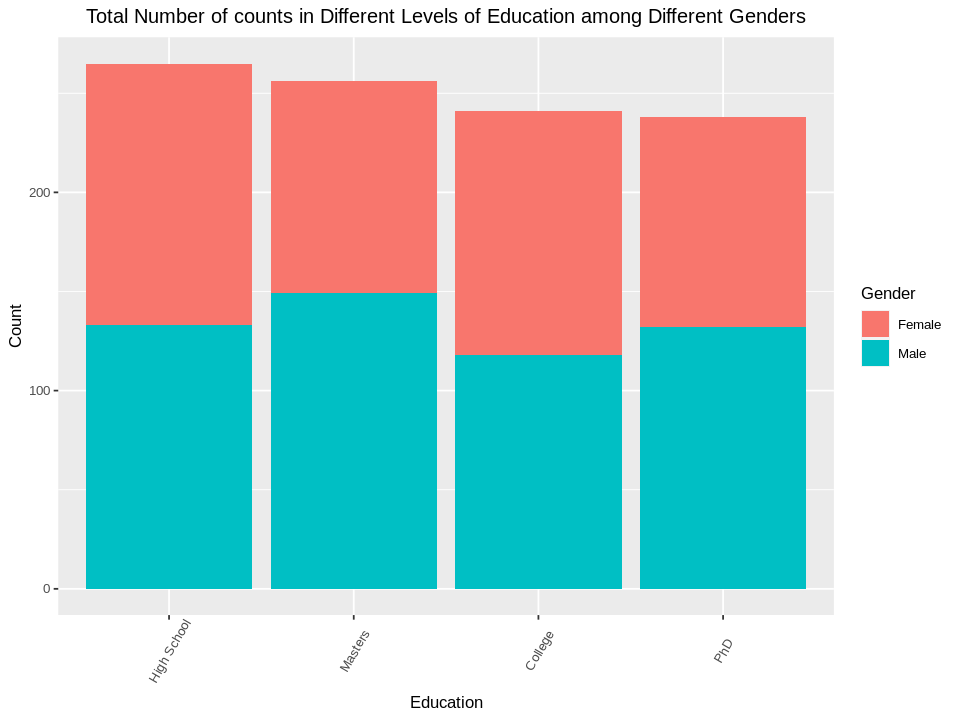

In [8]:
# Education distribution

education <- df %>%
    group_by(Gender,Education) %>%
    summarise(n=n())

options(repr.plot.width = 8, repr.plot.height = 6)

education_dist <- education %>%
    ggplot(aes(x = reorder(Education, -n), y = n, fill = Gender))+
  geom_bar(stat = 'identity')+
  labs(x = "Education",
       y = "Count", 
       fill = "Gender",
       title = "Total Number of counts in Different Levels of Education among Different Genders")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 10))+
  theme(plot.title = element_text(hjust = 0.5))

education_dist

The education distribution shows that females and males are balanced among the four different levels of education within this dataset.

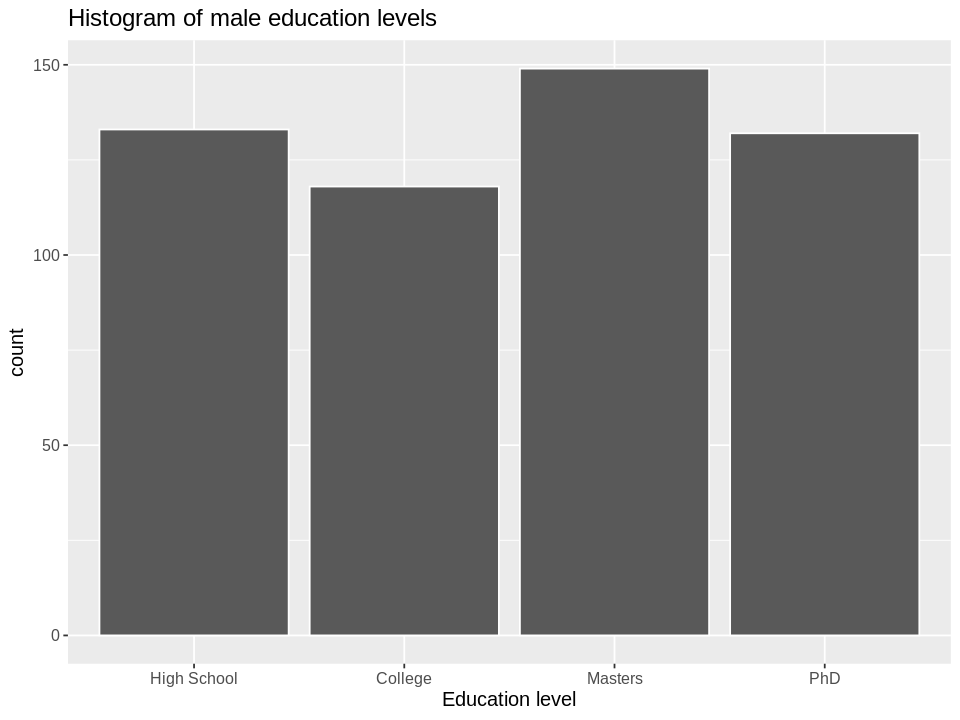

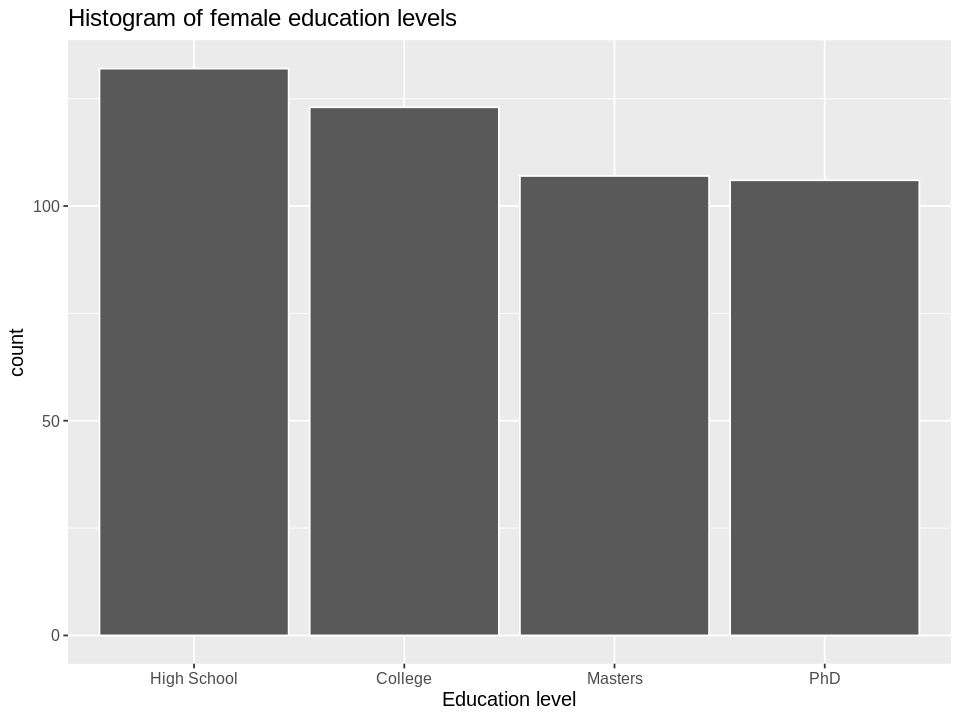

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)

# education level ordinal ordering
level_order <- c('High School', 'College', 'Masters', 'PhD') 

# educationPlot <- df %>% 
#     ggplot() +
#     geom_bar(aes(x = factor(Education, level = level_order)), color = 'white') +
#     ggtitle("Histogram of total education levels") +
#     xlab("Education level")+
#     theme(text = element_text(size = 12))


educationPlotMale <- df %>% 
    filter(Gender == "Male") |>
    ggplot() +
    geom_bar(aes(x = factor(Education, level = level_order)), color = 'white') +
    ggtitle("Histogram of male education levels") +
    xlab("Education level")+
    theme(text = element_text(size = 12))


educationPlotFemale <- df %>% 
    filter(Gender == "Female") |>
    ggplot() +
    geom_bar(aes(x = factor(Education, level = level_order)), color = 'white') +
    ggtitle("Histogram of female education levels") +
    xlab("Education level")+
    theme(text = element_text(size = 12))

# educationPlot
educationPlotMale
educationPlotFemale

Here we see that male educaiton level is more skewed towards higher education like PhD and Masters, while females have a greater proportion with High School and College education.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



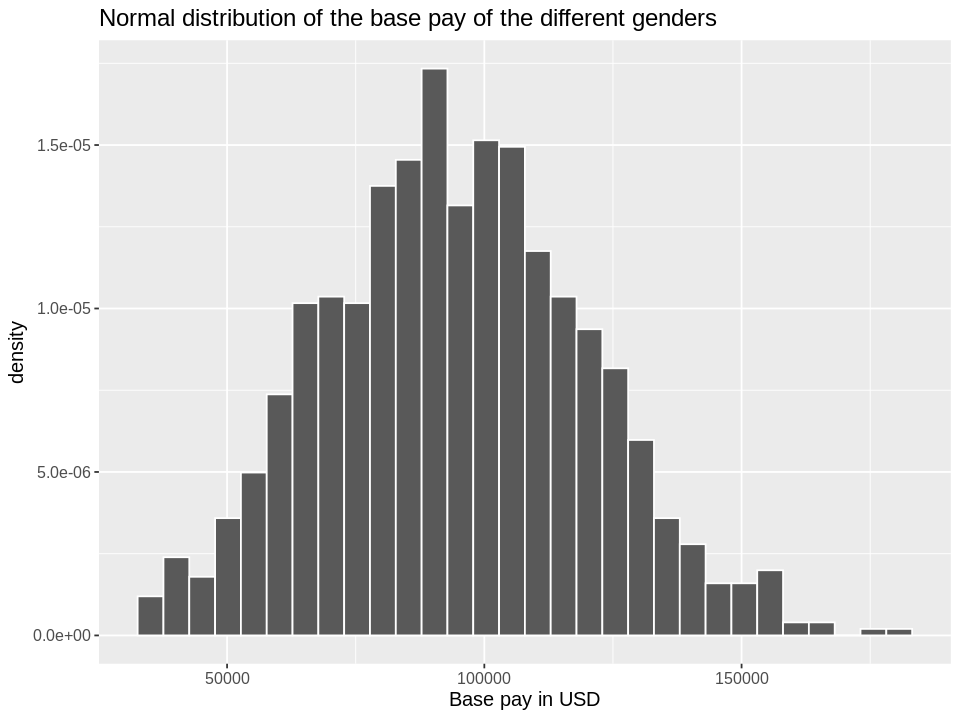

In [10]:
# check if wage distribution is Normal distribution
options(repr.plot.width = 8, repr.plot.height = 6)

wage_plot <- df %>%  
    ggplot() +
    geom_histogram(aes(BasePay, y = ..density..), color = 'white') +
    ggtitle("Normal distribution of the base pay of the different genders") +
    xlab("Base pay in USD")+
    theme(text = element_text(size = 12))

wage_plot

The base pay appears to be symmetrical, bell-shaped and unimodal. The BasePay is a standard Normal distribution.

### Feature engineering
Then we investigate the feature correlations and explore feature engineering.

In [11]:
# convert categorial features to numeric
df_mat <- data.matrix(df)
head(df_mat)

JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
4,1,18,5,1,4,2,42363,9938
9,2,21,5,1,3,5,108476,11128
10,1,19,4,4,1,5,90208,9268
9,2,20,5,3,5,4,108080,10154
4,2,26,5,3,2,5,99464,9319
5,1,20,5,4,4,4,70890,10126


In [12]:
# correlation matrix
corr_mat <- round(cor(df_mat),3) 
head(corr_mat)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
JobTitle,1.000,0.069,-0.017,-0.007,-0.017,-0.007,0.005,0.046,0.044
Gender,0.069,1.000,-0.029,0.067,0.062,0.004,-0.028,0.168,-0.003
Age,-0.017,-0.029,1.000,-0.057,0.020,0.047,-0.021,0.563,-0.414
PerfEval,-0.007,0.067,-0.057,1.000,0.027,0.000,-0.021,-0.054,0.855
Education,-0.017,0.062,0.020,0.027,1.000,0.000,0.016,0.142,0.054
Dept,-0.007,0.004,0.047,0.000,0.000,1.000,-0.082,0.031,-0.065


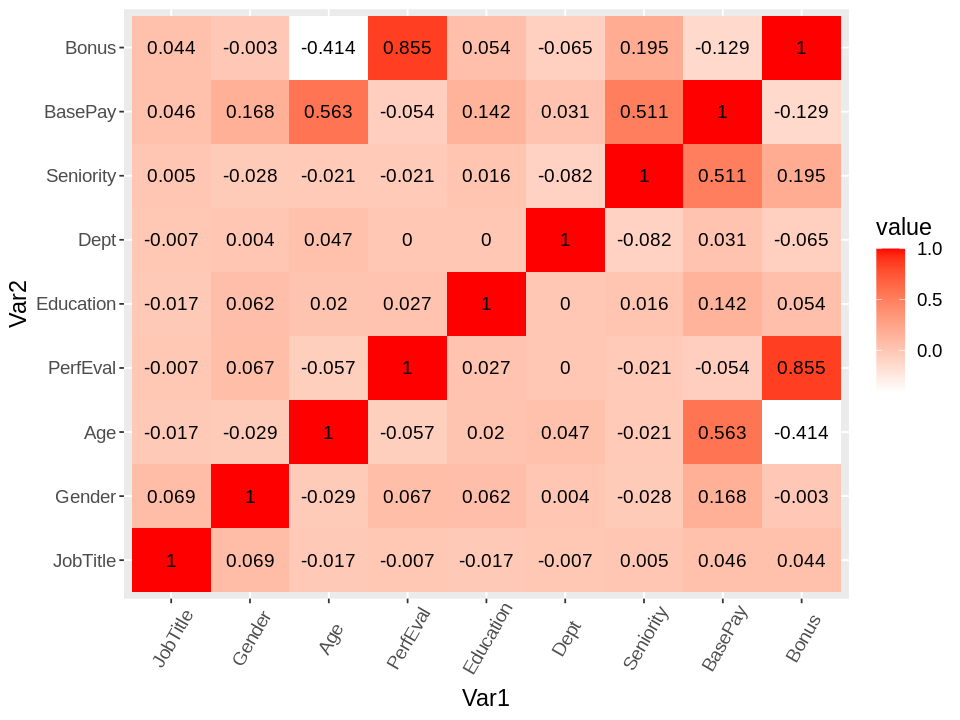

In [13]:
# reduce the size of correlation matrix
melted_corr_mat <- melt(corr_mat)
 
# plotting the correlation heatmap
library(ggplot2)
ggplot(data = melted_corr_mat, aes(x=Var1, y=Var2,fill=value)) +
geom_tile()+
scale_fill_gradient(low = "white", high = "red")+
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4)+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 14))+
  theme(plot.title = element_text(hjust = 0.5))

According to the correlation matrix, there is a weak correlation between 'BasePay' and 'Gender'. Moreover, the performace evaluation ('PerfEval') has a strong correlation with 'Bonus'. Therefore, we will add a new column named 'income' in the dataset summing 'BasePay' and 'Bonus' to reflect the individual's annual salary.

In [14]:
# add a new column "income" to the dataframe
df_new <- df %>%
    mutate(income = BasePay + Bonus)
head(df_new)

JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,income
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
IT,Female,20,5,PhD,Operations,4,70890,10126,81016


In [16]:
point_estimates <- df_new |>
    group_by(Gender) |>
    summarise(mean = mean(income), standard_deviation = sd(income))

percent_diff <- (point_estimates$mean[2] -point_estimates$mean[1])/point_estimates$mean[1] 



diff_in_means = point_estimates$mean[2] -point_estimates$mean[1]


point_estimates

"difference in Means (Male - Female):"
diff_in_means
"% Difference:"
percent_diff *100


Gender,mean,standard_deviation
<chr>,<dbl>,<dbl>
Female,96416.83,24202.16
Male,104918.68,25329.57


[1] "difference in Means (Male - Female):"

[1] 8501.847

[1] "% Difference:"

[1] 8.817804

Here we  calculate the mean and standard deviation of our point estimate using the full sample, and we see that the mean male pay is ~8.8% higher than the mean female pay. The standard deviation for both genders is very similar when accounting for the difference in means.

***
Ayuho and Jennifer's section
***

## Methods: Plan

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

Finish this section by reflecting on how your final report might play out:

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?


Describe how are you carrying out the statistical analysis & communicate the uncertainty?

What is your point estimate?

How do you quantify the errors of your estimates?

How do you establish statistical significance of your findings?

What do you expect to find?

What are the potential challenges/drawbacks?

How do you make sure your analysis is reproducible?


 There have long been voices of inequality about income differences between men and women, and although these differences are believed to have improved today, this report will provide an opportunity to examine them in detail with various factors. Here, the various factors include performance evaluation, different departments and education level, which are important criteria for setting wages for men and women. In other words, this report is reliable because we are analyzing whether the difference in income is logically reasonable in consideration of various levels, not just by superficially grasping incomes between men and women. The gender pay gap between men and women not only reduces women's lifetime earnings, but also affects their pensions causing significant poverty in their later life. The findings will have an impact, especially on women in the world, as they will suggest whether the subsequent happiness and quality of life of women themselves will be positive or negative.
 
 As an indicator to compare incomes between men and women, we used the average of income difference as a point estimate. And the hypothesis that are going to be tested would be $H_0: \mu_1 - \mu_2 = 0$ vs $H_1: \mu_1 - \mu_2 \neq 0$ where $\mu_1$ is the mean income of men and $\mu_2$ is the mean income of women. Since we do not know the actual standard deviation of the population, which would be the income difference of all men and women in the world, we will use the sample standard deviation. In order to handle this uncertainty well, the two-sample t-test method will be used. When estimating the sampling distribution, we might use simulation which is bootstrapping as well as theoretical null model which is t-distribution. Then, by computing confidence interval it will be able to quantify the errors of the difference between $\mu_1$ and $\mu_2$ as well. Last but not least, significant difference of income between men and women will be determined by the significance level, which is 5%. Comparing the critical value with test statistic, or p-value with significance level would give an evidence to reject or not rejct the null hypothesis.
 
 Since the society has improved in terms of gender issues, it is expected not to have an enough evidence to conclude that there's a significant discrepancy of income considering other factors. Of course the data will not represent the whole population, which would be the potential challenge, but ~. The analysis being reproducible would not be a problem since the data we are using is fully provided and the code are all labelled with explanations. When it comes to generating random samples, setting seed would also help making the anaylsis reproducible.
 



## References
At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.

**APA style**

Maloney, Carolyn B. (April 2016). "Gender Pay Inequity: Consequences for Women, Families and the Economy" (PDF). Joint Economic Committee.

Statistics Canada. (2022). Table 14-10-0324-01 Average and median gender pay ratio in annual wages, salaries and commissions [Data table]. https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410032401&pickMembers%5b0%5d=1.8&cubeTimeFrame.startYear=2015&cubeTimeFrame.endYear=2019&referencePeriods=20150101%2c20190101

Bishu, S. G., & Alkadry, M. G. (2017). A Systematic Review of the Gender Pay Gap and Factors That Predict It. Administration & Society, 49(1), 65–104. https://doi.org/10.1177/0095399716636928

Alkadry, M.G. and Tower, L.E. (2006), Unequal Pay: The Role of Gender. Public Administration Review, 66: 888-898. https://doi.org/10.1111/j.1540-6210.2006.00656.x

United States. Department of Labor. Office of the Solicitor. (1963). Legislative history of the Equal Pay Act of 1963, amending section 6 of the Fair Labor Standards Act of 1938, as amended, Public Law 88-38, 88th Congress, H.R. 6060 and S. 1409. Washington :U.S. G.P.O.,